<a href="https://colab.research.google.com/github/MohitSinghal2811/Ai-hackathon2020/blob/master/Auto_encoders_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten
from keras. layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.datasets import mnist
from keras.utils import plot_model
from keras import backend as K


In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
(x_train, _), (x_test, _) = mnist.load_data()
image_size = x_train.shape[1]
# print(x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [6]:
#reshaping and normalizing the input images
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
#network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
latent_dim = 16
layer_filters = [32, 64]

In [13]:
inputs = Input(shape = input_shape, name = 'encoder_input')
x = inputs
for filters in layer_filters:
  x = Conv2D(filters = filters, kernel_size = kernel_size, activation= 'relu', strides = 2, padding  = 'same')(x)
x = Flatten()(x)
latent = Dense(latent_dim, name = 'latent_vector')(x)

In [14]:
encoder = Model(inputs, latent, name = 'encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                50192     
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________


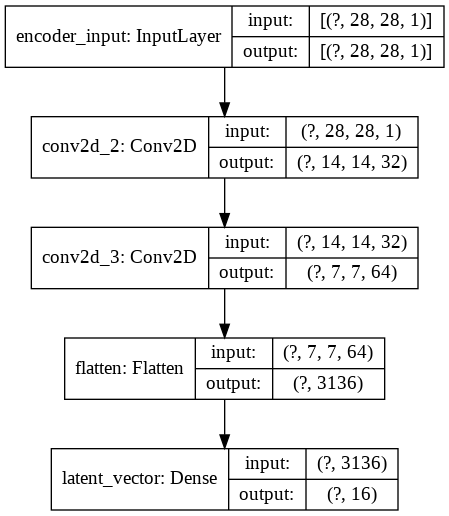

In [15]:
plot_model(encoder, to_file='encoder.png', show_shapes=True)